# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

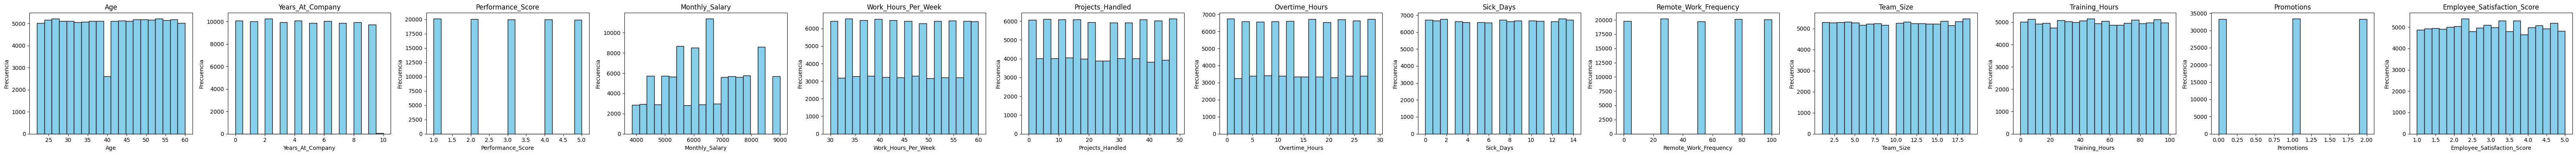

In [2]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [3]:
# X serán todas las columnas numéricas excepto la variable objetivo
X = numeric_columns.drop('Employee_Satisfaction_Score', axis=1)

# y será la variable objetivo
y = numeric_columns['Employee_Satisfaction_Score']

# Convertimos la satisfacción en categorías 0–4
y = y.apply(lambda x: round(x) - 1)

# Estandarización
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

# Separación de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_standar, y, test_size=0.33, random_state=42
)

# One-hot encoding para clasificación multiclase
y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test  = tf.keras.utils.to_categorical(y_test, 5)


- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc).

In [ ]:
# En las siguientes celdas, construye tu modelo con tensorflow.keras solo la arquitectura

Modelo 1 - MLP Simple (Baseline)

In [4]:
model_1 = models.Sequential(name="MLP_simple")

model_1.add(layers.Input(shape=(X_train.shape[1],)))  # Número de features
model_1.add(layers.Dense(16, activation='relu'))

model_1.add(layers.Dense(5, activation='softmax'))  # 5 clases


Modelo 2 - MLP Profundo (Deep Learning)

In [5]:
model_2 = models.Sequential(name="MLP_deep")

model_2.add(layers.Input(shape=(X_train.shape[1],)))

model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))

model_2.add(layers.Dense(5, activation='softmax'))


Modelo 3 - MLP con Regularizacion (Dropout y BatchNorm)

In [6]:
model_3 = models.Sequential(name="MLP_regularized")

model_3.add(layers.Input(shape=(X_train.shape[1],)))

model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.3))

model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dropout(0.3))

model_3.add(layers.Dense(5, activation='softmax'))


- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [ ]:
# En las siguientes celdas, compila y entrena el modelo

Entrenamiento del Modelo 1 – MLP Simple

In [7]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2494 - loss: 1.6081 - val_accuracy: 0.2531 - val_loss: 1.5620
Epoch 2/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2551 - loss: 1.5573 - val_accuracy: 0.2550 - val_loss: 1.5591
Epoch 3/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2565 - loss: 1.5577 - val_accuracy: 0.2522 - val_loss: 1.5587
Epoch 4/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2606 - loss: 1.5548 - val_accuracy: 0.2496 - val_loss: 1.5584
Epoch 5/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2611 - loss: 1.5554 - val_accuracy: 0.2528 - val_loss: 1.5586
Epoch 6/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2601 - loss: 1.5538 - val_accuracy: 0.2531 - val_loss: 1.5583
Epoch 7/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2614 - loss: 1.5529 - val_accuracy: 0.2525 - val_loss: 1.5579
Epoch 8/50
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2628 - loss: 1.5563 -

Entrenamiento del Modelo 2 – MLP Profundo

In [8]:
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=70,
    batch_size=32,
    verbose=1
)


Epoch 1/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2544 - loss: 1.5624 - val_accuracy: 0.2508 - val_loss: 1.5580
Epoch 2/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2605 - loss: 1.5556 - val_accuracy: 0.2538 - val_loss: 1.5610
Epoch 3/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2591 - loss: 1.5560 - val_accuracy: 0.2552 - val_loss: 1.5586
Epoch 4/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2656 - loss: 1.5539 - val_accuracy: 0.2509 - val_loss: 1.5583
Epoch 5/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2624 - loss: 1.5537 - val_accuracy: 0.2521 - val_loss: 1.5587
Epoch 6/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2671 - loss: 1.5550 - val_accuracy: 0.2537 - val_loss: 1.5593
Epoch 7/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2684 - loss: 1.5522 - val_accuracy: 0.2514 - val_loss: 1.5589
Epoch 8/70
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2708 - loss: 1.5534 - 

Entrenamiento del Modelo 3 – MLP Regularizado

In [9]:
model_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    X_train, y_onehot_train,
    validation_data=(X_test, y_onehot_test),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2399 - loss: 1.7174 - val_accuracy: 0.2533 - val_loss: 1.5603
Epoch 2/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2545 - loss: 1.5569 - val_accuracy: 0.2513 - val_loss: 1.5583
Epoch 3/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2519 - loss: 1.5585 - val_accuracy: 0.2494 - val_loss: 1.5582
Epoch 4/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2555 - loss: 1.5560 - val_accuracy: 0.2496 - val_loss: 1.5576
Epoch 5/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2525 - loss: 1.5546 - val_accuracy: 0.2525 - val_loss: 1.5571
Epoch 6/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2542 - loss: 1.5566 - val_accuracy: 0.2544 - val_loss: 1.5569
Epoch 7/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2598 - loss: 1.5553 - val_accuracy: 0.2504 - val_loss: 1.5570
Epoch 8/100
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2550 - loss: 

- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.

Gráficas comparativas entre los 3 modelos (accuracy y loss)





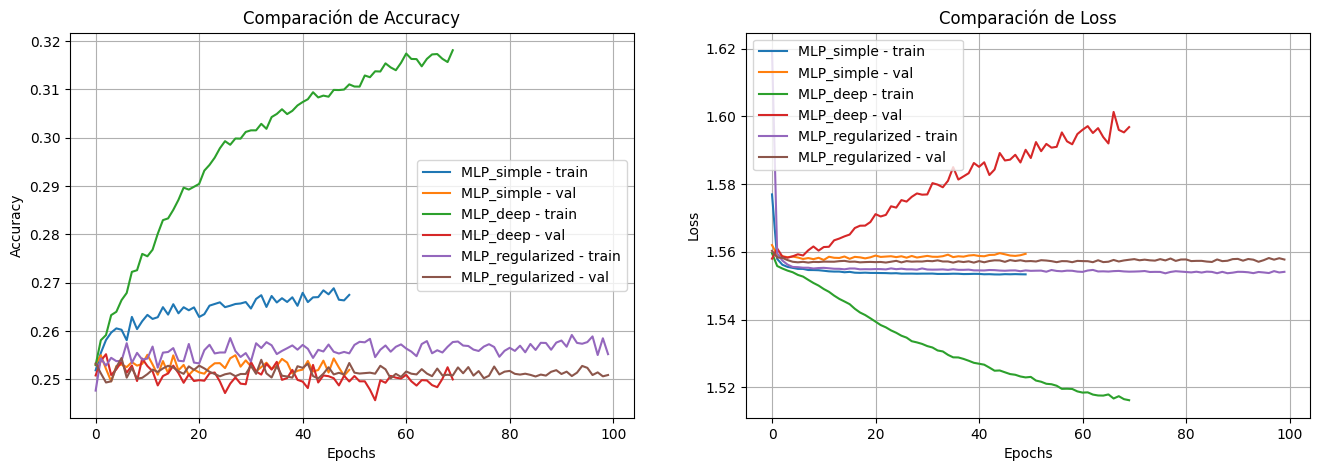

In [10]:

# Histories: history_1, history_2, history_3

plt.figure(figsize=(16,5))

# ----------- ACCURACY -----------
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='MLP_simple - train')
plt.plot(history_1.history['val_accuracy'], label='MLP_simple - val')

plt.plot(history_2.history['accuracy'], label='MLP_deep - train')
plt.plot(history_2.history['val_accuracy'], label='MLP_deep - val')

plt.plot(history_3.history['accuracy'], label='MLP_regularized - train')
plt.plot(history_3.history['val_accuracy'], label='MLP_regularized - val')

plt.title('Comparación de Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ----------- LOSS -----------
plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='MLP_simple - train')
plt.plot(history_1.history['val_loss'], label='MLP_simple - val')

plt.plot(history_2.history['loss'], label='MLP_deep - train')
plt.plot(history_2.history['val_loss'], label='MLP_deep - val')

plt.plot(history_3.history['loss'], label='MLP_regularized - train')
plt.plot(history_3.history['val_loss'], label='MLP_regularized - val')

plt.title('Comparación de Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


Gráficas individuales por modelo

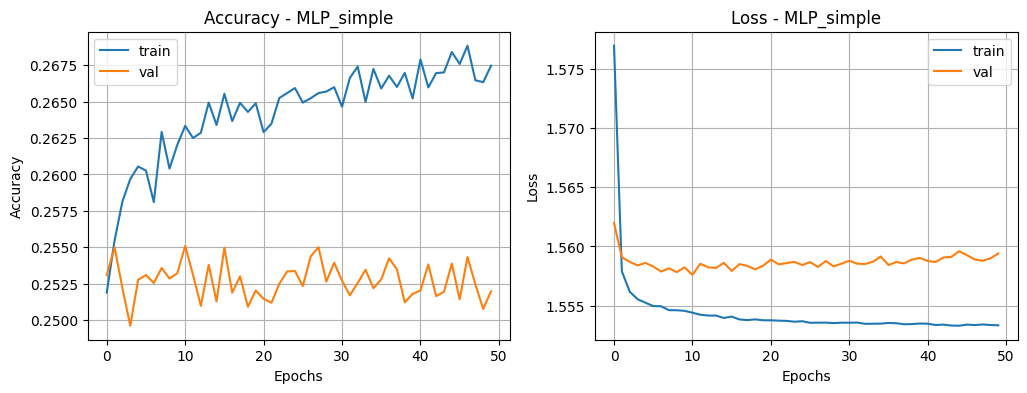

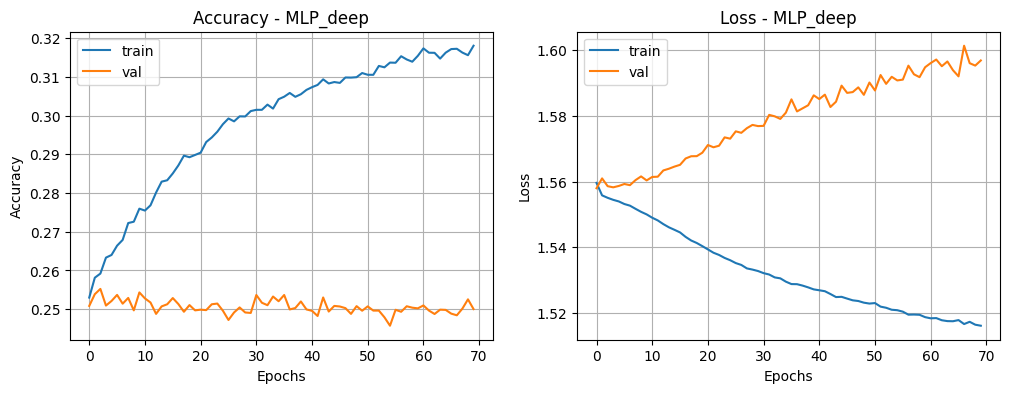

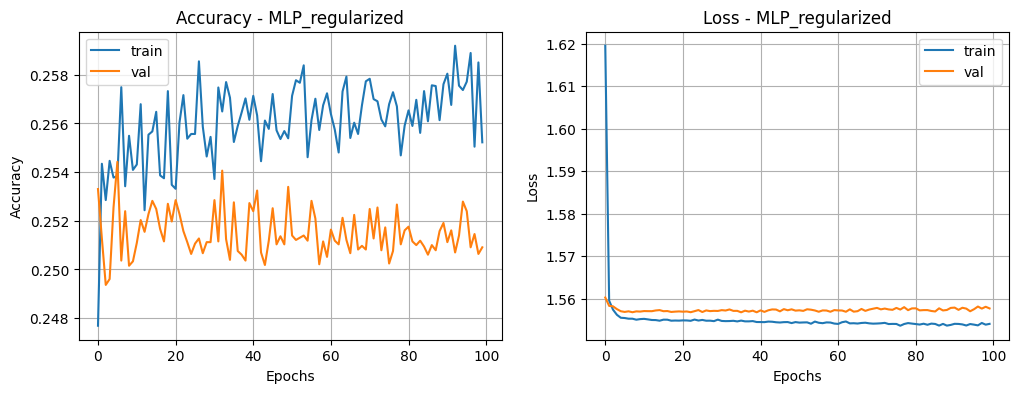

In [11]:
def plot_model_history(history, name):
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(f'Accuracy - {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f'Loss - {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_model_history(history_1, "MLP_simple")
plot_model_history(history_2, "MLP_deep")
plot_model_history(history_3, "MLP_regularized")


Evaluación final: Matriz de Confusión + Classification Report


====== Evaluación del modelo: MLP_simple ======

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


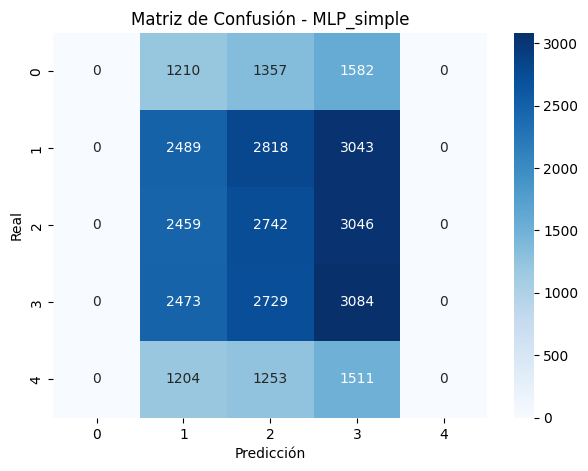


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4149
           1       0.25      0.30      0.27      8350
           2       0.25      0.33      0.29      8247
           3       0.25      0.37      0.30      8286
           4       0.00      0.00      0.00      3968

    accuracy                           0.25     33000
   macro avg       0.15      0.20      0.17     33000
weighted avg       0.19      0.25      0.22     33000


====== Evaluación del modelo: MLP_deep ======

  52/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


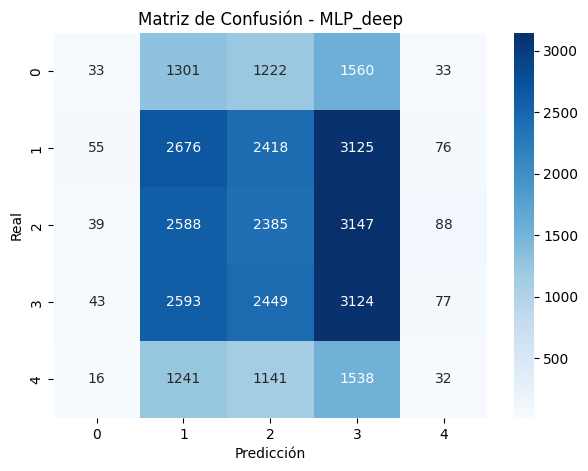


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.18      0.01      0.02      4149
           1       0.26      0.32      0.29      8350
           2       0.25      0.29      0.27      8247
           3       0.25      0.38      0.30      8286
           4       0.10      0.01      0.01      3968

    accuracy                           0.25     33000
   macro avg       0.21      0.20      0.18     33000
weighted avg       0.22      0.25      0.22     33000


====== Evaluación del modelo: MLP_regularized ======

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


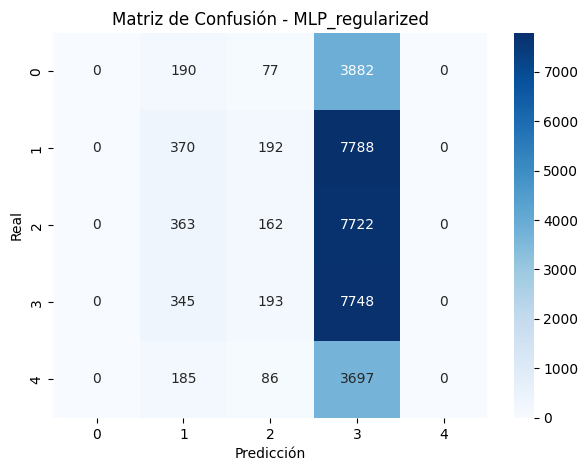


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4149
           1       0.25      0.04      0.08      8350
           2       0.23      0.02      0.04      8247
           3       0.25      0.94      0.40      8286
           4       0.00      0.00      0.00      3968

    accuracy                           0.25     33000
   macro avg       0.15      0.20      0.10     33000
weighted avg       0.18      0.25      0.13     33000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test, name):
    print(f"\n====== Evaluación del modelo: {name} ======\n")

    # Predicción
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Classification report
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

# Evaluar los tres modelos
evaluate_model(model_1, X_test, y_test, "MLP_simple")
evaluate_model(model_2, X_test, y_test, "MLP_deep")
evaluate_model(model_3, X_test, y_test, "MLP_regularized")
